In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [35]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [36]:
label=df.groupby('label')
label

In [37]:
label.get_group('rice')

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [38]:
label[["humidity"]].mean()



,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [39]:
labels=list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [40]:
# df['label'].nunique()           # this nunique function gives the number of unique labels in the label column
# df['label'].value_counts()      # this value_counts function gives the number of occurences of each label in the label column
# df['label'].unique()          # this unique function gives the unique labels in the label column


In [41]:
nitrogen = list(label[["N"]].mean().values.ravel())
nitrogen

[np.float64(20.8),
 np.float64(100.23),
 np.float64(40.02),
 np.float64(40.09),
 np.float64(21.98),
 np.float64(101.2),
 np.float64(117.77),
 np.float64(23.18),
 np.float64(78.4),
 np.float64(20.75),
 np.float64(18.77),
 np.float64(77.76),
 np.float64(20.07),
 np.float64(21.44),
 np.float64(20.99),
 np.float64(100.32),
 np.float64(19.58),
 np.float64(49.88),
 np.float64(20.73),
 np.float64(18.87),
 np.float64(79.89),
 np.float64(99.42)]

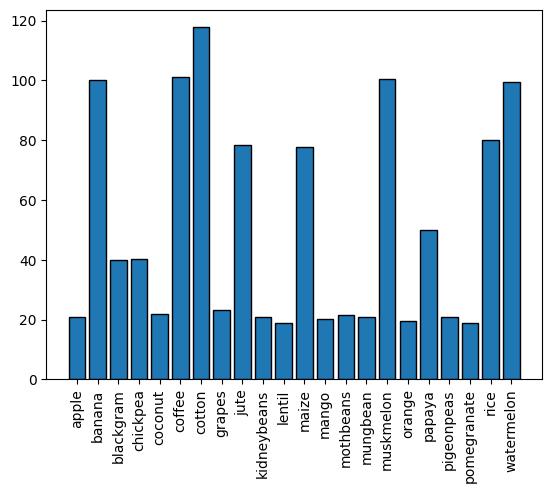

In [42]:
plt.bar(x=labels, height=nitrogen,ec="k")   # ec--> edge color, it is used to set the color of the edges of the bars
plt.xticks(rotation=90)  # it is used to rotate the x-axis labels by 90 degrees for better visibility
plt.show()

In [43]:
x=df.drop(['label'], axis=1)

In [44]:
## standardscaler -- normalizition is used to scale the data to a standard normal distribution and it is used to bring all the features to the same scale
## e.g. if one feature is in the range of 0-1 and another feature is in the range of 0-1000, then the second feature will dominate the first feature
## outlierss --> is a data point that is significantly different from the rest of the data points in the dataset
## standardscaler is used to scale the data to a standard normal distribution with mean=0
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_transformed=sc.fit_transform(x)
x_transformed.shape

(2200, 7)

In [45]:
desc=pd.DataFrame(x_transformed).describe()  # this describe function gives the statistical summary of the dataset, it includes count, mean, std, min, 25%, 50%, 75%, max
desc.head()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01


In [46]:
df.describe()  # this describe function gives the statistical summary of the dataset, it includes count, mean, std, min, 25%, 50%, 75%, max
# it will give percentiles of the data, it will give the mean, it will give the standard deviation, it will give the count of the data
# it will give the minimum value, it will give the maximum value, it will give the 25th percentile, it will give the 50th percentile, it will give the 75th percentile
# it will give the count of the data, it will give the mean of the data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [47]:
desc_formed=desc.applymap(lambda x: f"{int(x):d}")
desc_formed.head()

C:\Users\Akshat\AppData\Local\Temp\ipykernel_29552\355427245.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formed=desc.applymap(lambda x: f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0


In [48]:
from sklearn.cluster import KMeans
kmeans=KMeans()   # it will take bydefault 8 clusters, we can change the number of clusters by passing the n_clusters parameter kmeans=KMeans(n_clusters=8) 
 # we can change the number of clusters by passing the n_clusters parameter
kmeans.fit(x_transformed)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [49]:
label=kmeans.labels_  # it will give the labels of the clusters formed by the kmeans algorithm

In [50]:
df["clusters_8"]=label  # it will add the labels of the clusters formed by the kmeans algorithm to the dataframe


In [51]:
df["clusters_8"].value_counts()  # it will give the number of occurences of each cluster in the clusters_8 column   

clusters_8
7    524
4    407
1    302
2    286
5    285
3    200
6    103
0     93
Name: count, dtype: int64

In [52]:
df[df["label"]=="rice"]["clusters_8"].value_counts()  # it will give the number of occurences of each cluster in the clusters_8 column for the rice label

clusters_8
1    100
Name: count, dtype: int64

In [53]:
df[df["clusters_8"]==5]["label"].value_counts()  # it will give the number of occurences of each label in the label column for the clusters_8 column with value 5

label
pomegranate    100
coconut        100
orange          80
papaya           4
pigeonpeas       1
Name: count, dtype: int64

In [54]:
## met
from sklearn.metrics import silhouette_score
## range --> -1 to 1, the higher the better
silhouette_score(x_transformed, label)  # it will give the silhouette score of the clusters formed by the kmeans algorithm

0.3320717060492499

In [55]:
## wcss / inertia 
kmeans.inertia_  # it will give the inertia of the clusters formed by the kmeans algorithm, inertia is the sum of squared distances of samples to their closest cluster center

4943.268182143934

In [56]:
wcss={}
for i in range (5,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_transformed)
    wcss[i]=kmeans.inertia_

In [57]:
wcss

{5: 6868.0150733901755,
 6: 6060.974638513831,
 7: 5248.635677166101,
 8: 4883.880124988108,
 9: 4472.454562269399,
 10: 4244.786566082422,
 11: 3942.821558928392,
 12: 3942.785031059414,
 13: 3718.2535806955357,
 14: 3400.5579567385726,
 15: 3133.725019523119,
 16: 2930.396300324044,
 17: 2818.368451570974,
 18: 2614.546517048191,
 19: 2583.817315300413,
 20: 2561.7674731545912}

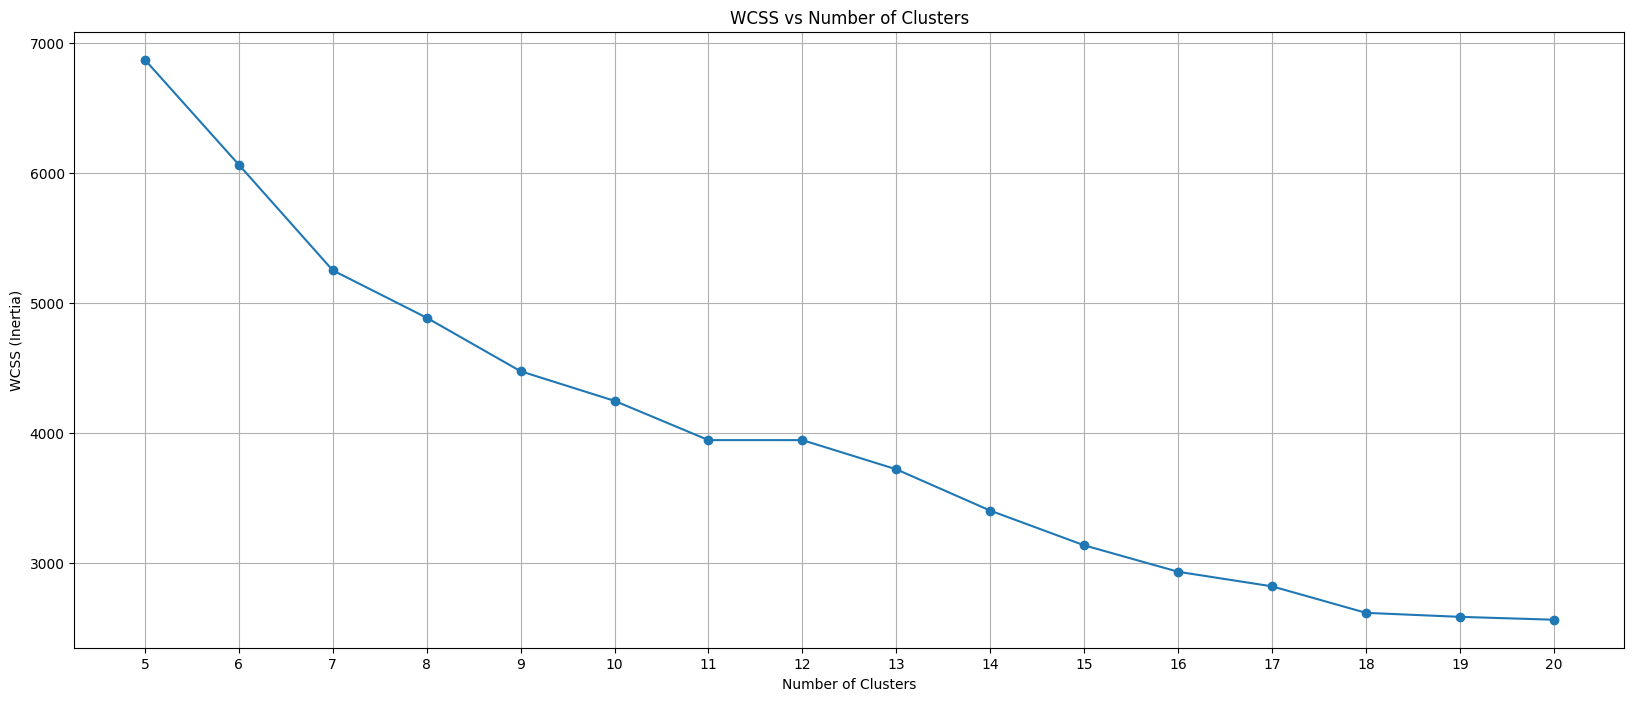

In [58]:
plt.figure(figsize=(20,8))
plt.plot(wcss.keys(), wcss.values(), marker='o')
## add a line
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')




plt.xticks(list(wcss.keys()))
plt.grid(True)
plt.show()

In [59]:
import joblib
joblib.dump(kmeans, 'Crop_recommendation.lb')  # it will save the k

['Crop_recommendation.lb']

In [60]:
joblib.dump(sc, 'scaler.lb')  # it will save the scaler

['scaler.lb']

In [61]:
joblib.dump(df,"crop_reco_df.lb") # it will save the dataframe with the clusters

['crop_reco_df.lb']